# Mercado de Autos: Asistencia al vendedor

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor


In [90]:
data = pd.read_csv('Mercado_Autos_Usados_USA.csv')

sns.set(style="darkgrid")

data

,Marca,Modelo,Año,Kilómetros,Motor,Transmisión,Tracción,Combustible,Color,DañosoAccidentes,PrimerPrpietario,UsoPersonal,Vendedor,PuntajeVendedor,PuntajeConductores,N_Reviews,Precio
0,Porsche,911 GT2 RS,2018,4997,3.8L,Automatico,Trasera,Nafta,Gris,0,0,1,Porsche Minneapolis,4.6,4.8,33,396990
1,Porsche,911 Speedster,2019,2043,4.0L,Manual,Trasera,Nafta,Rojo,0,0,1,HGreg.com Lux,4.7,4.9,13,389000
2,Porsche,911 Speedster,2019,1308,4.0L,Manual,Trasera,Nafta,Negro,0,1,1,Porsche Colorado Springs,4.7,4.9,13,383000
3,Porsche,911 GT2 RS,2018,5216,3.8L,Automatico,Trasera,Nafta,Negro,1,1,1,Audi Fresno,4.7,4.8,33,381999
4,Porsche,911 GT2 RS,2018,7733,3.8L,Automatico,Trasera,Nafta,Gris,0,0,1,Porsche Marin,4.1,4.8,33,379991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39396,GMC,Envoy SLT,2002,194786,4.2L,Automatico,4x4,Nafta,Rojo,1,0,1,Peterson Auto Group,4.6,4.4,42,1395
39397,Jeep,Grand Cherokee Laredo,2004,119784,4.0L,Automatico,Trasera,Nafta,Gris,1,0,1,Dan Deery Toyota,4.6,4.2,135,1200
39398,Dodge,Avenger SE,2008,162222,2.4L,Automatico,Delantera,Nafta,Negro,1,0,0,Western Avenue Nissan,1.9,4.2,83,975
39399,Kia,Sorento LX,2007,251072,3.8L,Automatico,4x4,Nafta,Blanco,1,0,0,Dan Deery Toyota,4.6,4.5,29,900


## Abstracto de Motivación:

La determinación del valor de los automóviles es un desafío clave tanto para compradores como para vendedores en el mercado de autos usados. Factores como la marca, el modelo, el año de fabricación, el kilometraje y las condiciones generales del vehículo pueden influir significativamente en su precio. Este proyecto tiene como objetivo desarrollar un modelo de predicción de precios de automóviles basado en datos históricos, utilizando técnicas de análisis de datos y aprendizaje automático.

La motivación principal radica en la necesidad de mejorar la transparencia y precisión en la valuación de vehículos, ayudando a reducir la incertidumbre en las transacciones. Un modelo predictivo eficiente puede facilitar la toma de decisiones informadas, optimizar las estrategias de compra y venta, y mejorar la experiencia del consumidor en este mercado dinámico.

Este proyecto esta destinado al beneficio de los siguientes grupos:

* Compradores y vendedores de autos usados que buscan conocer un precio justo antes de realizar una transacción.
* Concesionarios y plataformas de venta de autos interesados en establecer estrategias de precios más precisas y competitivas.

## Problema principal:

El objetivo principal de este proyecto es desarrollar un modelo de regresión que permita predecir con precisión el valor de un automóvil, utilizando técnicas de aprendizaje automático y análisis de datos para entrenar varios modelos que estimen con precisión estos valores basándose en las diversas características de los vehículos, para luego comparar los modelos y encontrar cual es el mejor entre ellos.

## Análisis Exploratorio de Datos (EDA):

### Información de columnas:

* Marca, Modelo, Año: Identificación del vehículo.

* Kilómetros: Distancia recorrida, un factor clave en la depreciación.

* Motor, Transmisión, Tracción, Combustible, Color: Características técnicas.

* Daños o Accidentes, Primer Propietario, Uso Personal: Historial del auto.

* Vendedor, Puntaje Vendedor, Puntaje Conductores, N_Reviews: Datos sobre la venta y reputación del vehículo o vendedor.

* Precio: Variable objetivo a predecir.

### Valores faltantes:

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39401 entries, 0 to 39400
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marca               39401 non-null  object 
 1   Modelo              39401 non-null  object 
 2   Año                 39401 non-null  int64  
 3   Kilómetros          39401 non-null  int64  
 4   Motor               39401 non-null  object 
 5   Transmisión         39401 non-null  object 
 6   Tracción            39401 non-null  object 
 7   Combustible         39401 non-null  object 
 8   Color               39401 non-null  object 
 9   DañosoAccidentes    39401 non-null  int64  
 10  PrimerPrpietario    39401 non-null  int64  
 11  UsoPersonal         39401 non-null  int64  
 12  Vendedor            39401 non-null  object 
 13  PuntajeVendedor     39401 non-null  float64
 14  PuntajeConductores  39401 non-null  float64
 15  N_Reviews           39401 non-null  int64  
 16  Prec

In [92]:
data.describe()

,Año,Kilómetros,DañosoAccidentes,PrimerPrpietario,UsoPersonal,PuntajeVendedor,PuntajeConductores,N_Reviews,Precio
count,39401.000000,39401.000000,39401.000000,39401.000000,39401.000000,39401.000000,39401.000000,39401.000000,39401.000000
mean,2019.101952,43287.780564,0.191975,0.641202,0.709754,4.261854,4.636004,81.506053,38120.023502
std,2.971990,36674.890927,0.393858,0.479654,0.453882,0.712738,0.285466,111.934586,28127.915808
min,1993.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,500.000000
25%,2018.000000,18471.000000,0.000000,0.000000,0.000000,4.000000,4.500000,11.000000,21397.000000
50%,2020.000000,33176.000000,0.000000,1.000000,1.000000,4.500000,4.700000,41.000000,32415.000000
75%,2021.000000,58123.000000,0.000000,1.000000,1.000000,4.800000,4.800000,104.000000,46131.000000
max,2023.000000,938032.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,396990.000000


### Visualizaciones:

C:\Users\ema04\AppData\Local\Temp\ipykernel_19760\785876189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Año", y="Precio", palette="viridis", showfliers = False)


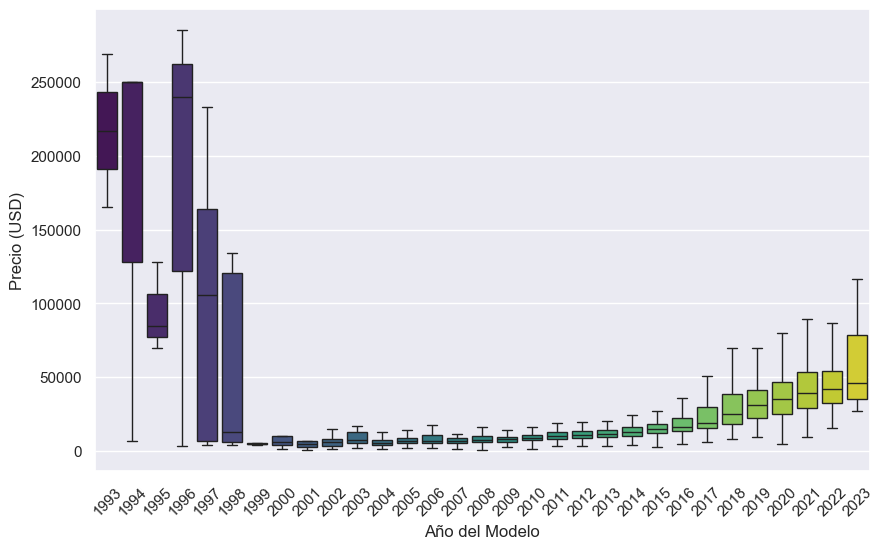

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Año", y="Precio", palette="viridis", showfliers = False)
plt.xticks(rotation=45)
plt.ylabel("Precio (USD)")
plt.xlabel("Año del Modelo")
plt.show()

* Boxplot de Precios por Año: Los autos más nuevos tienden a tener precios más altos, sin embargo hay excepciones en cuanto a autos antiguos de lujo o de colección.

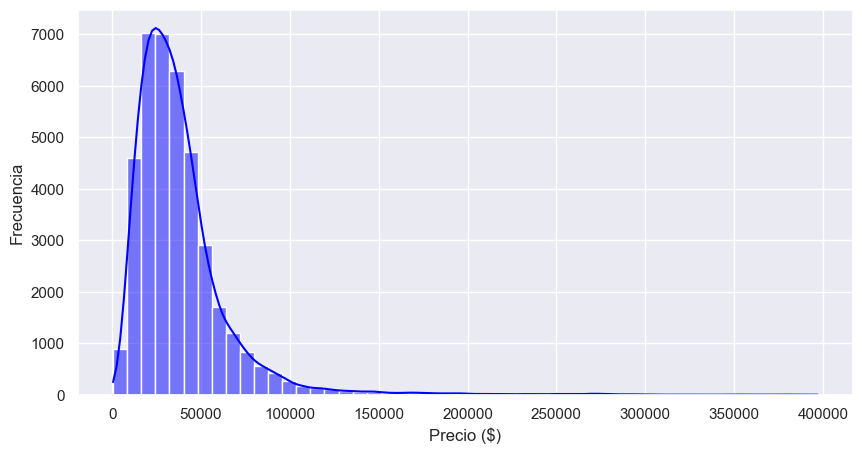

In [94]:
plt.figure(figsize=(10, 5))
sns.histplot(data["Precio"], bins=50, kde=True, color="blue")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.show()

* Distribución de Precios: La mayoría de los autos tienen precios por debajo de los $50,000, con una pequeña cantidad de vehículos de lujo que superan los $100,000.

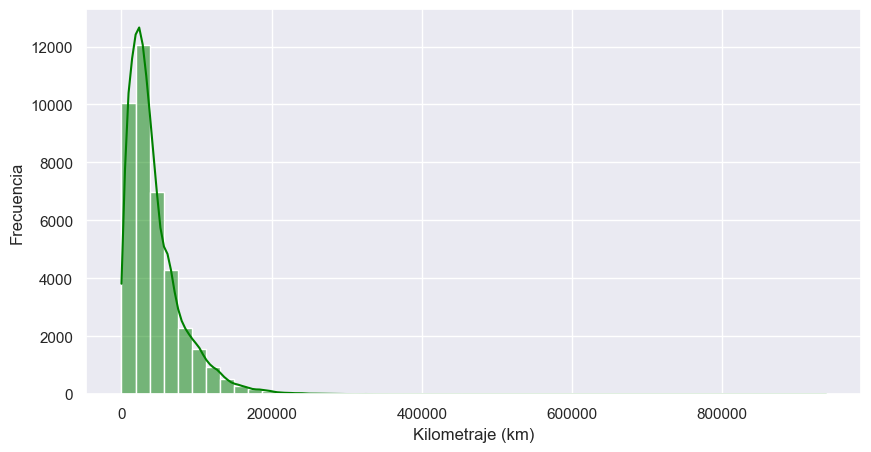

In [95]:
plt.figure(figsize=(10, 5))
sns.histplot(data["Kilómetros"], bins=50, kde=True, color="green")
plt.xlabel("Kilometraje (km)")
plt.ylabel("Frecuencia")
plt.show()

* Distribución del Kilometraje: La mayoría de los autos tienen menos de 100,000 km, pero hay algunos con kilometraje extremadamente alto.

## Ingeniería de Atributos:

Al transformar o crear nuevas variables se puede incrementar la eficiencia del modelo, por ejemplo:

* La creación de la variable "Antigüedad": lo años que pasaron desde su fabricación, se calcula restando el año actual (2025), al año de fabricación.

* Categorizar la variable de kilometraje en tres categorías como "Bajo", "Medio" y "Alto".

* Utilizando "One-Hot Encoding", transformamos las variables de "Tracción", "Combustible", "Marca", "Transmisión".

In [96]:
data["Antigüedad"] = 2025 - data["Año"]

In [97]:
# Categorizar "Kilómetros" en Bajo, Medio y Alto (usando percentiles como referencia)
data["Kilometraje_Cat"] = pd.qcut(data["Kilómetros"], q=3, labels=["Bajo", "Medio", "Alto"])

In [98]:
# Aplicar One-Hot Encoding a "Tracción" y "Combustible"
data_tr = pd.get_dummies(data, columns=["Marca", "Tracción", "Combustible", "Transmisión"], prefix=["Marca", "Tracción", "Combustible", "Transmisión"])

In [99]:
data_tr

,Modelo,Año,Kilómetros,Motor,Color,DañosoAccidentes,PrimerPrpietario,UsoPersonal,Vendedor,PuntajeVendedor,...,Combustible_E85 Flex Fuel,Combustible_Hibrido,Combustible_Nafta,Transmisión_Automatico,Transmisión_CVT,Transmisión_Doble Embrague,Transmisión_ECT,Transmisión_IVT,Transmisión_Manual,Transmisión_Variable
0,911 GT2 RS,2018,4997,3.8L,Gris,0,0,1,Porsche Minneapolis,4.6,...,False,False,True,True,False,False,False,False,False,False
1,911 Speedster,2019,2043,4.0L,Rojo,0,0,1,HGreg.com Lux,4.7,...,False,False,True,False,False,False,False,False,True,False
2,911 Speedster,2019,1308,4.0L,Negro,0,1,1,Porsche Colorado Springs,4.7,...,False,False,True,False,False,False,False,False,True,False
3,911 GT2 RS,2018,5216,3.8L,Negro,1,1,1,Audi Fresno,4.7,...,False,False,True,True,False,False,False,False,False,False
4,911 GT2 RS,2018,7733,3.8L,Gris,0,0,1,Porsche Marin,4.1,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39396,Envoy SLT,2002,194786,4.2L,Rojo,1,0,1,Peterson Auto Group,4.6,...,False,False,True,True,False,False,False,False,False,False
39397,Grand Cherokee Laredo,2004,119784,4.0L,Gris,1,0,1,Dan Deery Toyota,4.6,...,False,False,True,True,False,False,False,False,False,False
39398,Avenger SE,2008,162222,2.4L,Negro,1,0,0,Western Avenue Nissan,1.9,...,False,False,True,True,False,False,False,False,False,False
39399,Sorento LX,2007,251072,3.8L,Blanco,1,0,0,Dan Deery Toyota,4.6,...,False,False,True,True,False,False,False,False,False,False


In [100]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39401 entries, 0 to 39400
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Modelo                      39401 non-null  object  
 1   Año                         39401 non-null  int64   
 2   Kilómetros                  39401 non-null  int64   
 3   Motor                       39401 non-null  object  
 4   Color                       39401 non-null  object  
 5   DañosoAccidentes            39401 non-null  int64   
 6   PrimerPrpietario            39401 non-null  int64   
 7   UsoPersonal                 39401 non-null  int64   
 8   Vendedor                    39401 non-null  object  
 9   PuntajeVendedor             39401 non-null  float64 
 10  PuntajeConductores          39401 non-null  float64 
 11  N_Reviews                   39401 non-null  int64   
 12  Precio                      39401 non-null  int64   
 13  Antigüedad      

In [101]:
data_tr.to_csv('Mercado_Autos_Usados_USA_Transformado.csv', index=False)

## Entrenamiento y Testeo:

### Random Forest:

In [102]:
# Saco las variables no numéricas y la variable a predecir
x = data.drop(columns=["Marca", "Transmisión", "Tracción", "Combustible", "Modelo", "Motor", "Color", "Vendedor", "Precio", "Kilometraje_Cat"])

# Variable a predecir
y = data["Precio"]

In [103]:
# Divido el dataset usando un 80% de los datos para entrenamiento y un 20% para test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
# Normalizo las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# Entreno el modelo de Random Forest, con 150 arboles sacrificando tiempo de entrenamiento por estabilidad y precisión
modeloRF = RandomForestRegressor(n_estimators=150, random_state=42)
modeloRF.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [117]:
# Validación cruzada con 5 folds
cv_scores_rf = cross_val_score(modeloRF, X_train_scaled, y_train, cv=5, scoring="neg_mean_absolute_error")

In [118]:
# Predicciones en el conjunto de prueba
y_pred = modeloRF.predict(X_test_scaled)

# Evalúo el modelo
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"MAE {mae_rf:.2f}: ${mae_rf:.2f} (en promedio, el modelo se equivoca por esta cantidad en la predicción del precio).")

print(f"R2 {r2_rf:.2f}: (el modelo explica aproximadamente el 72% de la variabilidad en los precios).")

print(f"Validación Cruzada, {cv_scores_rf.mean():.2f}: error medio en los datos de validación")

MAE 7409.32: $7409.32 (en promedio, el modelo se equivoca por esta cantidad en la predicción del precio).
R2 0.72: (el modelo explica aproximadamente el 72% de la variabilidad en los precios).
Validación Cruzada, -7569.86: error medio en los datos de validación


### Regresión Lineal:

In [108]:
# Utilizo el modelo de regresión lineal
modelLR = LinearRegression()
modelLR.fit(X_train_scaled, y_train)

LinearRegression()

In [109]:
# Validación cruzada con 5 folds
cv_scores_lr = cross_val_score(modelLR, X_train_scaled, y_train, cv=5, scoring="neg_mean_absolute_error")

In [115]:
# Predicciones en el conjunto de prueba
y_pred_lr = modelLR.predict(X_test_scaled)

# Evalúo el modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE {mae_lr:.2f}: ${mae_lr:.2f}")
print(f"R2 {r2_lr:.2f}")
print(f"Validación Cruzada {cv_scores_lr.mean():.2f}")

MAE 15345.32: $15345.32
R2 0.23
Validación Cruzada -15064.99


### XGBoost Regressor:

### Comparación:

In [122]:
comparacion_modelos = pd.DataFrame({
    "Modelo": ["Random Forest", "Regresión Lineal"],
    "MAE (Menor Mejor)": [mae_rf, mae_lr],
    "R² (Mayor Mejor)": [r2_rf, r2_lr],
    "Validación Cruzada MAE (Menor Mejor)": [cv_scores_rf.mean(), cv_scores_lr.mean()]
})
comparacion_modelos

,Modelo,MAE (Menor Mejor),R² (Mayor Mejor),Validación Cruzada MAE (Menor Mejor)
0,Random Forest,7409.319230,0.721111,-7569.862433
1,Regresión Lineal,15345.318391,0.228888,-15064.991021
